In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!pip install -q kaggle
!mkdir .kaggle
import json
token = {"username":<add your kaggle user name>,"key":<add your kaggle json key>}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
!kaggle competitions download -c severstal-steel-defect-detection

100% 1.57G/1.57G [00:26<00:00, 42.2MB/s]
100% 1.57G/1.57G [00:26<00:00, 62.9MB/s]


In [ ]:
!unzip /content/{/content}/competitions/severstal-steel-defect-detection/severstal-steel-defect-detection.zip -d /content/dataset

In [ ]:
!pip install scipy==1.2.2

     |████████████████████████████████| 24.8MB 130kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.2.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
from collections import namedtuple
Label = namedtuple( 'Label' , [

        'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

        'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

        'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

        'category'    , # The name of the category that this label belongs to

        'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

        'hasInstances', # Whether this label distinguishes between single instances or not

        'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

        'color'       , # The color of this label
        ] )

In [ ]:
labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (0, 0,0) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 255,255,255) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  255,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
        
]

In [ ]:
'''
You should not edit helper.py as part of your submission.

This file is used primarily to download vgg if it has not yet been,
give you the progress of the download, get batches for your training,
as well as around generating and saving the image outputs.
'''

import re
import random
import numpy as np
import os.path
import scipy.misc
import shutil
import zipfile
import time
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from glob import glob
from urllib.request import urlretrieve
from tqdm import tqdm
import cv2
train_path = Path("dataset/train_images/")
class DLProgress(tqdm):
	"""
	Report download progress to the terminal.
	:param tqdm: Information fed to the tqdm library to estimate progress.
	"""
	last_block = 0

	def hook(self, block_num=1, block_size=1, total_size=None):
		"""
		Store necessary information for tracking progress.
		:param block_num: current block of the download
		:param block_size: size of current block
		:param total_size: total download size, if known
		"""
		self.total = total_size
		self.update((block_num - self.last_block) * block_size)  # Updates progress
		self.last_block = block_num


def maybe_download_pretrained_vgg(data_dir):
	"""
	Download and extract pretrained vgg model if it doesn't exist
	:param data_dir: Directory to download the model to
	"""
	vgg_filename = 'vgg.zip'
	vgg_path = os.path.join(data_dir, 'vgg')
	vgg_files = [
		os.path.join(vgg_path, 'variables/variables.data-00000-of-00001'),
		os.path.join(vgg_path, 'variables/variables.index'),
		os.path.join(vgg_path, 'saved_model.pb')]

	missing_vgg_files = [vgg_file for vgg_file in vgg_files if not os.path.exists(vgg_file)]
	if missing_vgg_files:
		# Clean vgg dir
		if os.path.exists(vgg_path):
			shutil.rmtree(vgg_path)
		os.makedirs(vgg_path)

		# Download vgg
		print('Downloading pre-trained vgg model...')
		with DLProgress(unit='B', unit_scale=True, miniters=1) as pbar:
			urlretrieve(
				'https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/vgg.zip',
				os.path.join(vgg_path, vgg_filename),
				pbar.hook)

		# Extract vgg
		print('Extracting model...')
		zip_ref = zipfile.ZipFile(os.path.join(vgg_path, vgg_filename), 'r')
		zip_ref.extractall(data_dir)
		zip_ref.close()

		# Remove zip file to save space
		os.remove(os.path.join(vgg_path, vgg_filename))

        
def name_and_mask(start_idx):
    row = start_idx
    img_name = train_df.ImageId[row]
    label = train_df.ClassId[row]
    mask = np.zeros((256, 1600, 1), dtype=np.uint8)

    if label is not np.nan:
        mask_label = np.zeros(1600*256, dtype=np.uint8)
        label = train_df.EncodedPixels[row].split(" ")
        positions = map(int, label[0::2])
        length = map(int, label[1::2])
        for pos, le in zip(positions, length):
            mask_label[pos-1:pos+le-1] = 1
        mask[:, :, 0] = mask_label.reshape(256, 1600, order='F')
    return img_name, mask


def gen_batch_function( image_shape):
    """
    Generate function to create batches of training data
    :param data_folder: Path to folder that contains all the datasets
    :param image_shape: Tuple - Shape of image
    :return:
    """
    def get_batches_fn(batch_size):
        """
        Create batches of training data
        :param batch_size: Batch Size
        :return: Batches of training data
        """
        
        print("Working")
        counter=0
        
        # Loop through batches and grab images, yielding each batch
        for batch_i in range(0, len(idx_class_multi), batch_size):
            images = []
            gt_images = []
            for index  in idx_class_multi[batch_i:batch_i+batch_size]:
                image_path  , mask  = name_and_mask(index)
        
                # Re-size to image_shape
                image = cv2.imread(str(train_path / image_path))
                #cv2 resize (width , height)
                image = cv2.resize(image, (800,256), interpolation = cv2.INTER_AREA)
                gt_image = cv2.resize(mask, (800,256), interpolation = cv2.INTER_AREA)
                # Create "one-hot-like" labels by class
                color_list=[]
                for color_id in range(2):
                    gt_bg = np.array(gt_image == color_id).astype(np.uint8)
                    gt_bg = gt_bg.reshape(*gt_bg.shape, 1)
                    color_list.append(gt_bg)
                gt_image = np.concatenate(color_list, axis=2)
                images.append(image)
                gt_images.append(gt_image)

            yield np.array(images), np.array(gt_images)
    return get_batches_fn


def gen_test_output(sess, logits, keep_prob, image_pl, data_folder, image_shape):
	"""
	Generate test output using the test images
	:param sess: TF session
	:param logits: TF Tensor for the logits
	:param keep_prob: TF Placeholder for the dropout keep probability
	:param image_pl: TF Placeholder for the image placeholder
	:param data_folder: Path to the folder that contains the datasets
	:param image_shape: Tuple - Shape of image
	:return: Output for for each test image
	"""
	for image_file in glob(os.path.join(data_folder, '*.jpg')):
		image = cv2.imread(image_file)
		image = cv2.resize(image, (800,256), interpolation = cv2.INTER_AREA)

		# Run inference
		im_softmax = sess.run(
			[tf.nn.softmax(logits)],
			{keep_prob: 1.0, image_pl: [image]})
		# Splice out second column (road), reshape output back to image_shape
		im_softmax = im_softmax[0][:, 1].reshape(image_shape[0], image_shape[1])
		# If road softmax > 0.5, prediction is road
		segmentation = (im_softmax > 0.5).reshape(image_shape[0], image_shape[1], 1)
		# Create mask based on segmentation to apply to original image
		mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))
		mask = scipy.misc.toimage(mask, mode="RGBA")
		street_im = scipy.misc.toimage(image)
		street_im.paste(mask, box=None, mask=mask)

		yield os.path.basename(image_file), np.array(street_im)


def save_inference_samples(runs_dir, data_dir, sess, image_shape, logits, keep_prob, input_image):
	"""
	Save test images with semantic masks of lane predictions to runs_dir.
	:param runs_dir: Directory to save output images
	:param data_dir: Path to the directory that contains the datasets
	:param sess: TF session
	:param image_shape: Tuple - Shape of image
	:param logits: TF Tensor for the logits
	:param keep_prob: TF Placeholder for the dropout keep probability
	:param input_image: TF Placeholder for the image placeholder
	"""
	# Make folder for current run
	output_dir = os.path.join(runs_dir, str(time.time()))
	if os.path.exists(output_dir):
		shutil.rmtree(output_dir)
	os.makedirs(output_dir)

	# Run NN on test images and save them to HD
	print('Training Finished. Saving test images to: {}'.format(output_dir))
	image_outputs = gen_test_output(
		sess, logits, keep_prob, input_image, '/content/dataset/test_images', image_shape)
	for name, image in image_outputs:
		scipy.misc.imsave(os.path.join("/content/result", name), image)

In [ ]:
import os.path
import tensorflow as tf
import helper
import warnings
from distutils.version import LooseVersion


# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))


def load_vgg(sess, vgg_path):
    """
    Load Pretrained VGG Model into TensorFlow.
    :param sess: TensorFlow Session
    :param vgg_path: Path to vgg folder, containing "variables/" and "saved_model.pb"
    :return: Tuple of Tensors from VGG model (image_input, keep_prob, layer3_out, layer4_out, layer7_out)
    """
    #set a tf graph for as container
    vgg_tag = 'vgg16'
    tf.saved_model.loader.load(sess,[vgg_tag],"/content/dataset/vgg/vgg/vgg")
    graph=tf.Graph()
    graph=tf.get_default_graph()
    
    vgg_input_tensor_name = 'image_input:0'
    vgg_keep_prob_tensor_name = 'keep_prob:0'
    vgg_layer3_out_tensor_name = 'layer3_out:0'
    vgg_layer4_out_tensor_name = 'layer4_out:0'
    vgg_layer7_out_tensor_name = 'layer7_out:0'
    
    input_image = graph.get_tensor_by_name(vgg_input_tensor_name)
    vgg_keeprob_tensor = graph.get_tensor_by_name(vgg_keep_prob_tensor_name)
    vgg_layer3_out = graph.get_tensor_by_name(vgg_layer3_out_tensor_name)
    vgg_layer4_out = graph.get_tensor_by_name(vgg_layer4_out_tensor_name)
    vgg_layer7_out = graph.get_tensor_by_name(vgg_layer7_out_tensor_name)
    
    return input_image , vgg_keeprob_tensor , vgg_layer3_out , vgg_layer4_out , vgg_layer7_out

TensorFlow Version: 2.3.0
Default GPU Device: /device:GPU:0


In [ ]:
def layers(vgg_layer3_out, vgg_layer4_out, vgg_layer7_out, num_classes):
    """
    Create the layers for a fully convolutional network.  Build skip-layers using the vgg layers.
    :param vgg_layer3_out: TF Tensor for VGG Layer 3 output
    :param vgg_layer4_out: TF Tensor for VGG Layer 4 output
    :param vgg_layer7_out: TF Tensor for VGG Layer 7 output
    :param num_classes: Number of classes to classify
    :return: The Tensor for the last layer of output
    """
    #take the last layer which is responsible to 32x upsample and use 1by1 conv with output kernels size=num classes
    conv_vgg7 = tf.layers.conv2d(vgg_layer7_out ,
                                num_classes ,
                                1 ,
                                strides=[1,1],
                                padding='same',
                                kernel_regularizer=tf.keras.regularizers.l2(1e-3))
    
    conv_2vgg7 = tf.layers.conv2d_transpose(conv_vgg7 , 
                                            filters=num_classes , 
                                            kernel_size=4 ,
                                            strides=[2,2],
                                            padding='same' ,
                                            kernel_regularizer=tf.keras.regularizers.l2(1e-3))
    #then the pool2 and conv_7_upsampled with same dimensions 
    conv_vgg4 = tf.layers.conv2d(vgg_layer4_out , 
                                filters=num_classes , 
                                kernel_size= 1 ,
                                strides=(1,1),
                                padding='same',
                                kernel_regularizer=tf.keras.regularizers.l2(1e-3))
    #add those tensors
    conv_add = tf.add(conv_vgg4 , conv_2vgg7)
    #use the upsample to match with output from vgg pool layer 3
    conv_2vgg4 = tf.layers.conv2d_transpose(conv_add , 
                                            filters=num_classes ,
                                            kernel_size= 4 ,
                                            strides= (2,2),
                                            padding='same',
                                            kernel_regularizer=tf.keras.regularizers.l2(1e-3))
    #convolute the vgg3 layer with 1by1 convolution with filter size = num_classes
    conv_vgg3 = tf.layers.conv2d(vgg_layer3_out , 
                                filters=num_classes,
                                kernel_size=1 ,
                                strides=(1,1),
                                padding='same',
                                kernel_regularizer=tf.keras.regularizers.l2(1e-3))
    #add the outputs 
    conv_add2 = tf.add(conv_vgg3 , conv_2vgg4)
    
    #totally upsample with stride 8 and kernerl size=16
    out_result = tf.layers.conv2d_transpose(conv_add2 , 
                                            filters=num_classes,
                                            kernel_size=16 ,
                                            strides=(8,8),
                                            padding='same',
                                            kernel_regularizer=tf.keras.regularizers.l2(1e-3))
    
    
    
    return out_result

In [ ]:

def optimize(nn_last_layer, correct_label, learning_rate, num_classes,with_accuracy=True):
    """
    Build the TensorFLow loss and optimizer operations.
    :param nn_last_layer: TF Tensor of the last layer in the neural network
    :param correct_label: TF Placeholder for the correct label image
    :param learning_rate: TF Placeholder for the learning rate
    :param num_classes: Number of classes to classify
    :return: Tuple of (logits, train_op, cross_entropy_loss)
    """
    logits = tf.reshape(nn_last_layer , (-1,num_classes))
    labels = tf.reshape(correct_label,(-1,num_classes))
    #define the loss function
    cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits ,
                                                                labels=labels))
    #initialize the adam optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(cross_entropy_loss)
    if with_accuracy:
        predictions_argmax = tf.argmax(nn_last_layer, axis=-1)
        labels_argmax = tf.argmax(correct_label, axis=-1)
        iou,iou_op = tf.metrics.mean_iou(labels_argmax , predictions_argmax , num_classes)
        iou_obj =[iou , iou_op]
        
        return logits , train_op , cross_entropy_loss , iou_obj
    else:
        return logits , train_op , cross_entropy_loss , None

In [ ]:
import numpy as np
def train_nn(sess, epochs, batch_size, get_batches_fn, train_op, cross_entropy_loss, input_image,
             correct_label, keep_prob, learning_rate ,acc_obj ,logits  ):
    """
    Train neural network and print out the loss during training.
    :param sess: TF Session
    :param epochs: Number of epochs
    :param batch_size: Batch size
    :param get_batches_fn: Function to get batches of training data.  Call using get_batches_fn(batch_size)
    :param train_op: TF Operation to train the neural network
    :param cross_entropy_loss: TF Tensor for the amount of loss
    :param input_image: TF Placeholder for input images
    :param correct_label: TF Placeholder for label images
    :param keep_prob: TF Placeholder for dropout keep probability
    :param learning_rate: TF Placeholder for learning rate
    """
    #run the trainer on all the epochs
    for epoch in range(epochs) :
        epoch_loss = 0
        image_cout = 0
        total_acc = 0
        batch_count=0
        #get the batches to train
        for batch_x , batch_y in get_batches_fn(batch_size):
            #in the training optimization use the loss and trainop to exucution
            _,loss = sess.run([train_op , cross_entropy_loss] ,feed_dict={
                input_image:batch_x ,
                correct_label:batch_y ,
                keep_prob:0.5 ,
                learning_rate:0.0001 
            })
            if(acc_obj is not None):
                iou = acc_obj[0]
                iou_op = acc_obj[1]
                sess.run(iou_op,feed_dict={
                    input_image:batch_x ,
                    correct_label:batch_y ,
                    keep_prob:1.0 ,
                    learning_rate:0.001
                })
                
                acc = sess.run(iou)
                total_acc += acc * len(batch_x)
            image_cout+=len(batch_x)
            batch_count +=1
            epoch_loss  += loss 
        epoch_acc = total_acc / image_cout
        epoch_loss = epoch_loss / batch_count
        #visualize the resulting logits
        #take a random image and show the image from last batch
        rand_idx = np.random.randint(0,len(batch_x))
        random_img,random_label= batch_x[rand_idx],batch_y[rand_idx]
        rand_img=random_img.reshape(1,*random_img.shape)
        rand_label =random_label.reshape(1,*random_label.shape)
        
        result ,loss = sess.run([logits , cross_entropy_loss] , feed_dict={
            input_image:rand_img ,
            correct_label:rand_label ,
            keep_prob:1.0 ,
            learning_rate:0.001
        })
        if((epoch+1)%10==0):
            saver = tf.train.Saver()
            saver.save(sess, "/content/gdrive/My Drive/steel_defect/model.ckpt")
        if(epoch%3==0):
            plot_results(random_img , np.squeeze(result))
        print("Training >>>>> Epoch : {} Epoch Loss : {} Epoch accuracy : {:.3f}".format(epoch ,epoch_loss , epoch_acc))

    
    pass

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np 
import torch.nn.functional as F

# PyTroch version

SMOOTH = 1e-6
fig = plt.figure(figsize=(10,10))
def plot_results(ori_image , result_img):
        plot_img(ori_image)
        class_image = iou_result(result_img)
        convert(class_image)


def iou_result(outputs):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
    outputs = outputs.reshape(256,800,2)
    outputs = np.transpose(outputs , (2,0,1))
    outputs = torch.tensor(outputs , dtype=torch.float , device='cpu').unsqueeze(0)
    output_prob = F.log_softmax(outputs , dim=1)
    #take the argmax value in the dim 1
    output_class = torch.argmax(output_prob , dim=1)
    output_class = output_class.squeeze(0)
    return output_class # Or thresholded.mean() if you are interested in average across the batch


def convert(mask):
    mask = mask.numpy()
    height , width = mask.shape
    copy_img = np.zeros((height , width , 3) , dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            idx = mask[i][j]
            label = labels[idx]
            color = label.color
            copy_img[i][j]=color
    plt.title("Segment Mask")
    plt.imshow(copy_img)
    plt.show()

def plot_img(image):
    #unnormallize the image
    plt.title("Original Image")
    plt.imshow(image)
    plt.show()

<Figure size 720x720 with 0 Axes>

In [ ]:
def restore_model(sess, model_path):
    """
    Restore session, which was previously saved to file.
    :param sess: TF Session
    :param model_path: path to several files having model_path as their prefix
    """
    saver = tf.train.import_meta_graph(model_path + '.meta')
    saver.restore(sess, model_path)

In [ ]:
process_load=True
def run():
    epochs=20
    num_classes = 2
    batch_size = 16
    image_shape = (256,800)  # KITTI dataset uses 160x576 images
    data_dir = '/content/dataset/vgg/vgg'
    runs_dir = '/runs'

    # Download pretrained vgg model
    maybe_download_pretrained_vgg(data_dir)

    # OPTIONAL: Train and Inference on the cityscapes dataset instead of the Kitti dataset.
    # You'll need a GPU with at least 10 teraFLOPS to train on.
    #  https://www.cityscapes-dataset.com/
    correct_label = tf.placeholder(tf.float32 , [None , None ,None , num_classes])
    learning_rate = tf.placeholder(tf.float32)

    with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
        # Path to vgg model
        vgg_path = os.path.join(data_dir, 'vgg')
        # Create function to get batches
        get_batches_fn = gen_batch_function(image_shape)

        # OPTIONAL: Augment Images for better results
        #  https://datascience.stackexchange.com/questions/5224/how-to-prepare-augment-images-for-neural-network

        # TODO: Build NN using load_vgg, layers, and optimize function
        input_image , keep_prob , vgg_layer3 , vgg_layer4 , vgg_layer7 = load_vgg(sess,vgg_path)
        
        last_layer = layers(vgg_layer3 ,  vgg_layer4 , vgg_layer7 , num_classes)
        
        logits , train_op , cross_entropy_loss , iou_obj = optimize(last_layer , correct_label ,learning_rate ,num_classes )
        
        #initialize all the gloabl and local defined variables for the training
        sess.run(tf.global_variables_initializer())
        sess.run(tf.local_variables_initializer())
        saver = tf.train.Saver()
        if(process_load):
            checkpoint = tf.train.get_checkpoint_state("/content/gdrive/My Drive/steel_defect")
            if checkpoint and checkpoint.model_checkpoint_path:
                saver.restore(sess, checkpoint.model_checkpoint_path)
                print("Successfully loaded:", checkpoint.model_checkpoint_path)
            else:
                print("Could not find old network weights")
        #run the training for the images
        train_nn(sess , epochs ,batch_size ,get_batches_fn ,train_op , cross_entropy_loss ,input_image ,correct_label ,keep_prob ,learning_rate , iou_obj ,logits )


        # TODO: Save inference data using helper.save_inference_samples
        #save_inference_samples(runs_dir, data_dir, sess, image_shape, logits, keep_prob, input_image)

## Data Visualization

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or

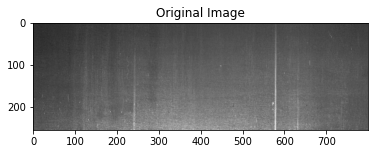

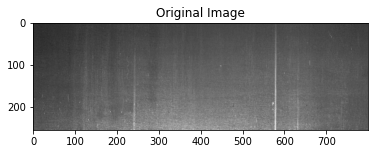

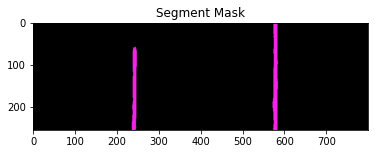

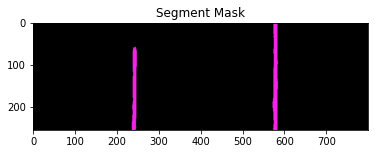

Training >>>>> Epoch : 0 Epoch Loss : 0.029697395785636193 Epoch accuracy : 0.898
Working
Training >>>>> Epoch : 0 Epoch Loss : 0.029697395785636193 Epoch accuracy : 0.898
Working
Training >>>>> Epoch : 1 Epoch Loss : 0.028402693953516113 Epoch accuracy : 0.897
Working
Training >>>>> Epoch : 1 Epoch Loss : 0.028402693953516113 Epoch accuracy : 0.897
Working
Training >>>>> Epoch : 2 Epoch Loss : 0.02782010821298369 Epoch accuracy : 0.898
Working
Training >>>>> Epoch : 2 Epoch Loss : 0.02782010821298369 Epoch accuracy : 0.898
Working


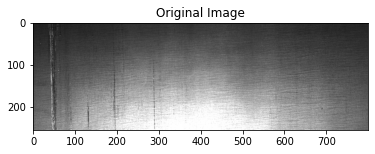

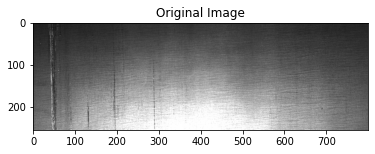

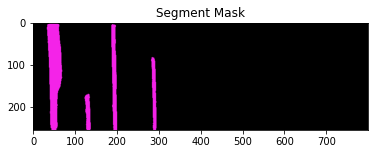

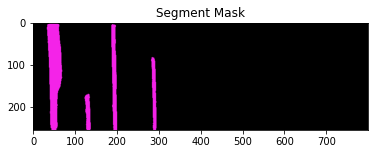

Training >>>>> Epoch : 3 Epoch Loss : 0.027324039843520737 Epoch accuracy : 0.899
Working
Training >>>>> Epoch : 3 Epoch Loss : 0.027324039843520737 Epoch accuracy : 0.899
Working
Training >>>>> Epoch : 4 Epoch Loss : 0.02704401316356149 Epoch accuracy : 0.899
Working
Training >>>>> Epoch : 4 Epoch Loss : 0.02704401316356149 Epoch accuracy : 0.899
Working
Training >>>>> Epoch : 5 Epoch Loss : 0.026736775125788006 Epoch accuracy : 0.900
Working
Training >>>>> Epoch : 5 Epoch Loss : 0.026736775125788006 Epoch accuracy : 0.900
Working


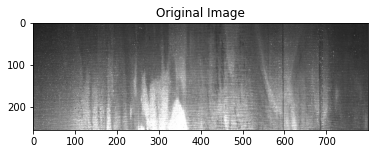

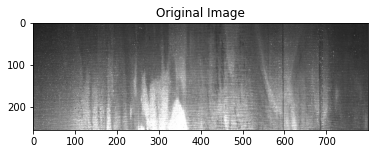

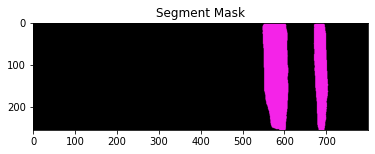

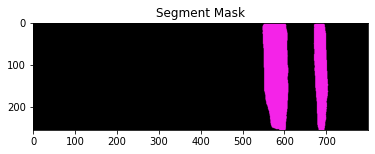

Training >>>>> Epoch : 6 Epoch Loss : 0.026671051838527526 Epoch accuracy : 0.900
Working
Training >>>>> Epoch : 6 Epoch Loss : 0.026671051838527526 Epoch accuracy : 0.900
Working
Training >>>>> Epoch : 7 Epoch Loss : 0.026439826016792574 Epoch accuracy : 0.901
Working
Training >>>>> Epoch : 7 Epoch Loss : 0.026439826016792574 Epoch accuracy : 0.901
Working
Training >>>>> Epoch : 8 Epoch Loss : 0.02594813720222462 Epoch accuracy : 0.901
Working
Training >>>>> Epoch : 8 Epoch Loss : 0.02594813720222462 Epoch accuracy : 0.901
Working


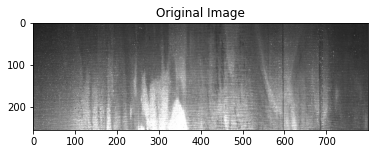

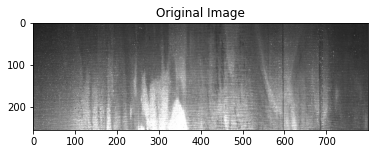

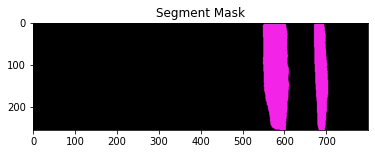

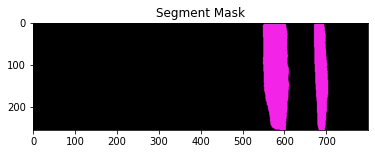

Training >>>>> Epoch : 9 Epoch Loss : 0.02557312083422198 Epoch accuracy : 0.902
Working
Training >>>>> Epoch : 9 Epoch Loss : 0.02557312083422198 Epoch accuracy : 0.902
Working
Training >>>>> Epoch : 10 Epoch Loss : 0.025251639715337136 Epoch accuracy : 0.902
Working
Training >>>>> Epoch : 10 Epoch Loss : 0.025251639715337136 Epoch accuracy : 0.902
Working
Training >>>>> Epoch : 11 Epoch Loss : 0.02497579206855179 Epoch accuracy : 0.903
Working
Training >>>>> Epoch : 11 Epoch Loss : 0.02497579206855179 Epoch accuracy : 0.903
Working


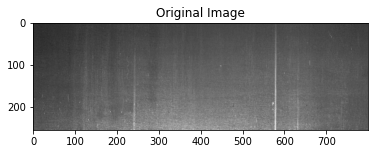

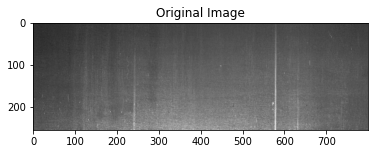

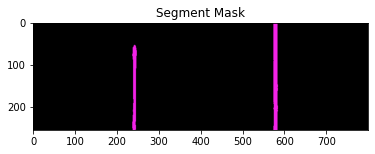

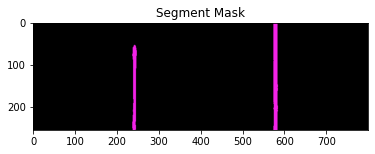

Training >>>>> Epoch : 12 Epoch Loss : 0.02470901290055465 Epoch accuracy : 0.903
Working
Training >>>>> Epoch : 12 Epoch Loss : 0.02470901290055465 Epoch accuracy : 0.903
Working
Training >>>>> Epoch : 13 Epoch Loss : 0.025173413225340547 Epoch accuracy : 0.903
Working
Training >>>>> Epoch : 13 Epoch Loss : 0.025173413225340547 Epoch accuracy : 0.903
Working
Training >>>>> Epoch : 14 Epoch Loss : 0.024431728839723242 Epoch accuracy : 0.904
Working
Training >>>>> Epoch : 14 Epoch Loss : 0.024431728839723242 Epoch accuracy : 0.904
Working


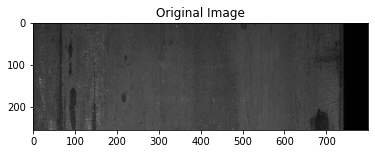

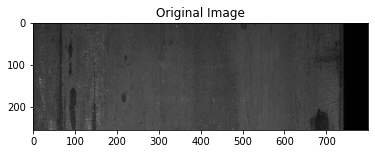

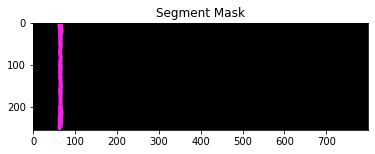

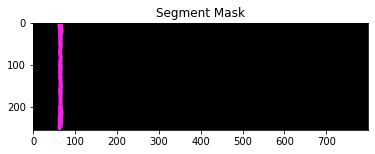

Training >>>>> Epoch : 15 Epoch Loss : 0.02431521750357304 Epoch accuracy : 0.904
Working
Training >>>>> Epoch : 15 Epoch Loss : 0.02431521750357304 Epoch accuracy : 0.904
Working
Training >>>>> Epoch : 16 Epoch Loss : 0.02463281680494211 Epoch accuracy : 0.904
Working
Training >>>>> Epoch : 16 Epoch Loss : 0.02463281680494211 Epoch accuracy : 0.904
Working
Training >>>>> Epoch : 17 Epoch Loss : 0.024021348479698907 Epoch accuracy : 0.905
Working
Training >>>>> Epoch : 17 Epoch Loss : 0.024021348479698907 Epoch accuracy : 0.905
Working


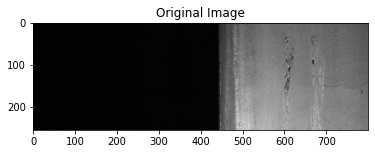

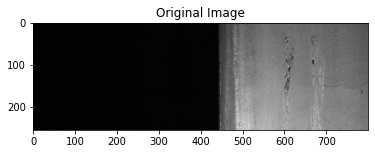

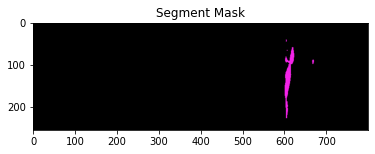

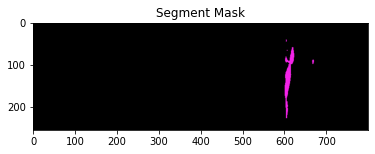

Training >>>>> Epoch : 18 Epoch Loss : 0.023591359840236133 Epoch accuracy : 0.905
Working
Training >>>>> Epoch : 18 Epoch Loss : 0.023591359840236133 Epoch accuracy : 0.905
Working
Training >>>>> Epoch : 19 Epoch Loss : 0.02320962811732111 Epoch accuracy : 0.905
Training >>>>> Epoch : 19 Epoch Loss : 0.02320962811732111 Epoch accuracy : 0.905


In [ ]:
if __name__ == '__main__':
    run()

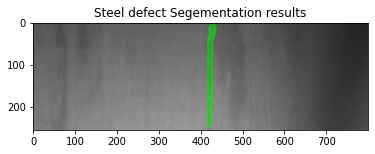

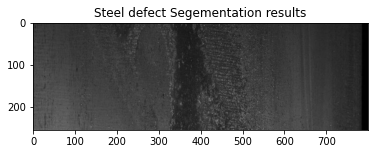

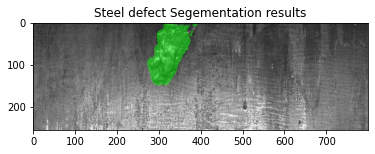

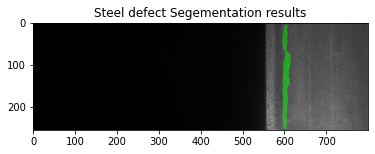

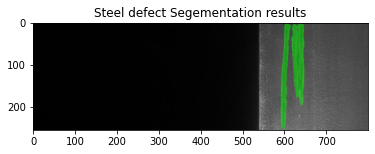

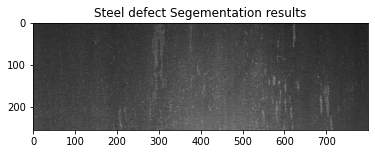

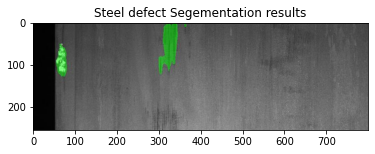

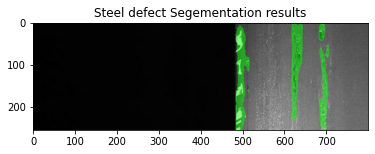

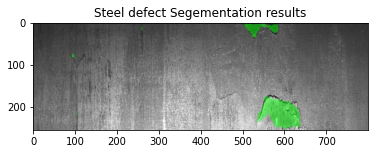

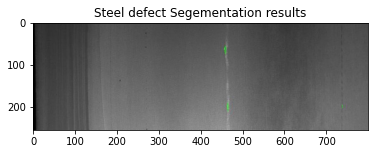

In [ ]:
import os
file_names =os.listdir('/content/result') 
import cv2
#plot some results
for idx in range(10):
  random_path = np.random.choice(file_names)
  image = cv2.imread(os.path.join("/content/result",random_path))
  img_rgb = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
  plt.imshow(img_rgb)
  plt.title("Steel defect Segementation results")
  plt.show()

In [ ]:
!pip install gast==0.2.2

  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=75b5b7ecc67f5b2a7b5821b94c004972a8621938edebc291b1159307208b0db4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


# Dataset visualization

In [ ]:
import numpy as np # linear algebra
import pandas as pd
pd.set_option("display.max_rows", 101)
import os
print(os.listdir("dataset"))
import cv2
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 15
import seaborn as sns
from collections import Counter
from PIL import Image
import math
import seaborn as sns
from collections import defaultdict
from pathlib import Path
import cv2
from tqdm import tqdm

input_dir = "dataset"

['sample_submission.csv', 'test_images', 'train.csv', 'vgg', 'train_images']


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_df = pd.read_csv("dataset/train.csv")
sample_df = pd.read_csv("dataset/sample_submission.csv")

In [ ]:
train_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [ ]:
len(train_df)

7095

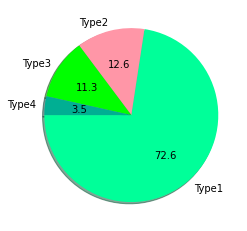

<Figure size 1152x1152 with 0 Axes>

,ImageId,EncodedPixels,ClassId
0,0000f269f.jpg,1 409600,0
1,000ccc2ac.jpg,1 409600,0
2,002451917.jpg,1 409600,0
3,003c5da97.jpg,1 409600,0
4,0042e163f.jpg,1 409600,0


In [ ]:
import matplotlib.pyplot as plt
labels_count = train_df.ClassId.value_counts()

%matplotlib inline
plt.pie(labels_count, labels=['Type1', 'Type2','Type3','Type4'], startangle=180, 
        autopct='%1.1f', colors=['#00ff99','#FF96A7','#00ff00','#00af93'], shadow=True)
plt.figure(figsize=(16,16))
plt.show()
sample_df.head()

In [ ]:
train_size_dict = defaultdict(int)
train_path = Path("dataset/train_images/")

for img_name in train_path.iterdir():
    img = Image.open(img_name)
    train_size_dict[img.size] += 1

In [ ]:
test_size_dict = defaultdict(int)
test_path = Path("dataset/test_images/")

for img_name in test_path.iterdir():
    img = Image.open(img_name)
    test_size_dict[img.size] += 1

In [ ]:
palet = [(249, 192, 12), (0, 185, 241), (114, 0, 218), (249,50,12)]

In [ ]:
def name_and_mask(start_idx):
    row = start_idx
    img_name = train_df.ImageId[row]

    label = train_df.ClassId[row]
    mask = np.zeros((256, 1600, 1), dtype=np.uint8)

    if label is not np.nan:
        mask_label = np.zeros(1600*256, dtype=np.uint8)
        label = train_df.EncodedPixels[row].split(" ")
        positions = map(int, label[0::2])
        length = map(int, label[1::2])
        for pos, le in zip(positions, length):
            mask_label[pos-1:pos+le-1] = 1
        mask[:, :, 0] = mask_label.reshape(256, 1600, order='F')
    return img_name, mask

In [ ]:
def show_mask_image(col , label=None):
    name, mask = name_and_mask(col)
    fig= plt.figure(figsize=(15,5))
    plt.imshow(mask.squeeze())
    plt.title("Defect Mask")
    img = cv2.imread(str(train_path / name))
    fig, ax = plt.subplots(figsize=(15, 15))

    for ch in range(1):
        contours, _ = cv2.findContours(mask[:, :, ch], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        for i in range(0, len(contours)):
            cv2.polylines(img, contours[i], True, palet[label-1], 2)
    ax.set_title(name)
    ax.imshow(img)
    plt.show()

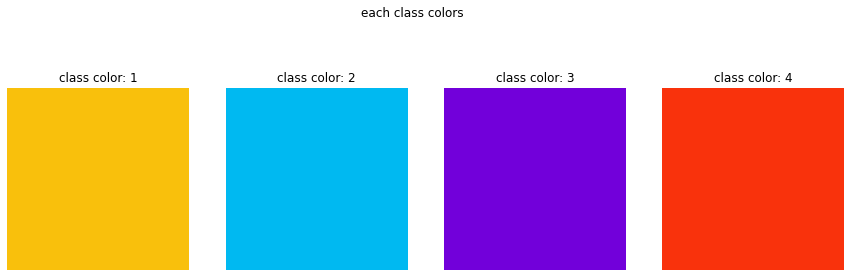

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(np.ones((50, 50, 3), dtype=np.uint8) * palet[i])
    ax[i].set_title("class color: {}".format(i+1))
fig.suptitle("each class colors")

plt.show()

In [ ]:
idx_no_defect = []
idx_class_1 = []
idx_class_2 = []
idx_class_3 = []
idx_class_4 = []
idx_class_multi = []
idx_class_triple = []

for row in range(0, len(train_df)):
    img_names = train_df.ImageId[row]   
    label = train_df.ClassId[row]
    idx_class_multi.append(row)
    if label is None:
        idx_no_defect.append(row)
    elif (label==1):
        idx_class_1.append(row)
    elif (label==2):
        idx_class_2.append(row)
    elif (label==3):
        idx_class_3.append(row)
    elif (label==4):
        idx_class_4.append(row)
    """
    elif label.isna().sum() == 1:
        idx_class_triple.append(col)
    else:
        idx_class_multi.append(col)
    """

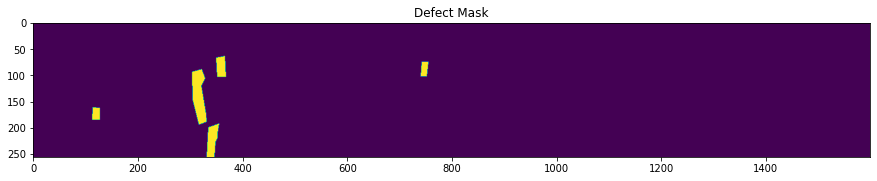

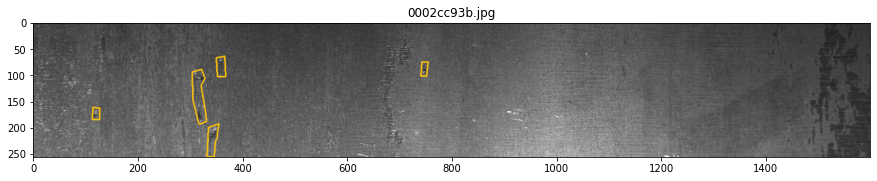

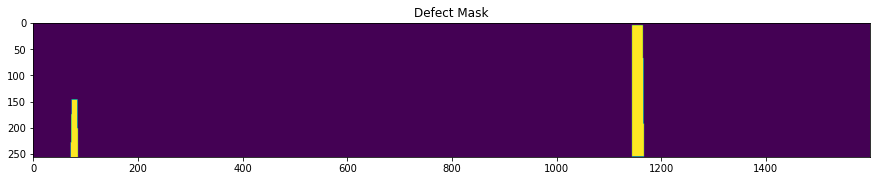

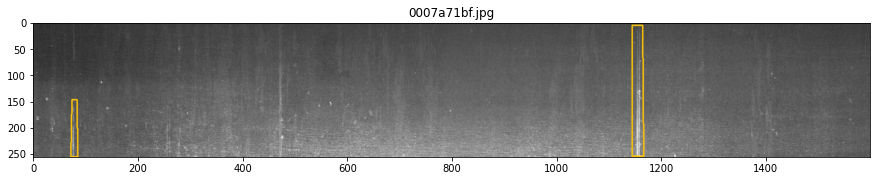

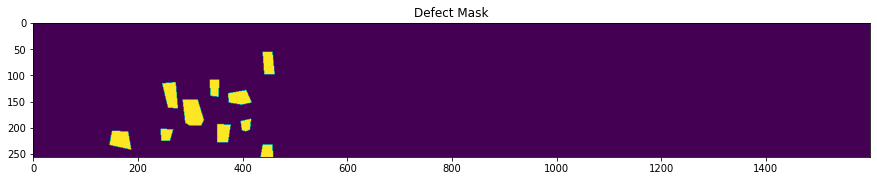

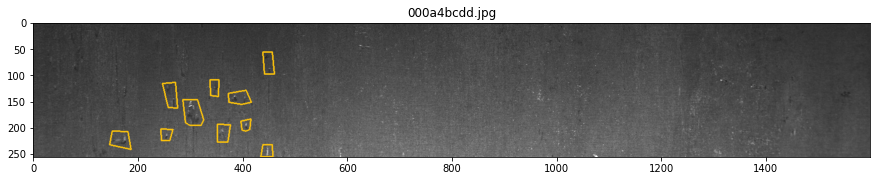

In [ ]:
for idx in idx_class_multi[:3]:
    show_mask_image(idx, label=1)

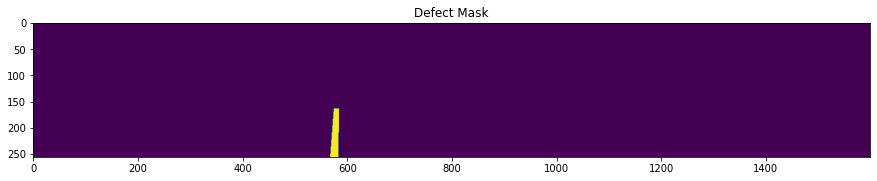

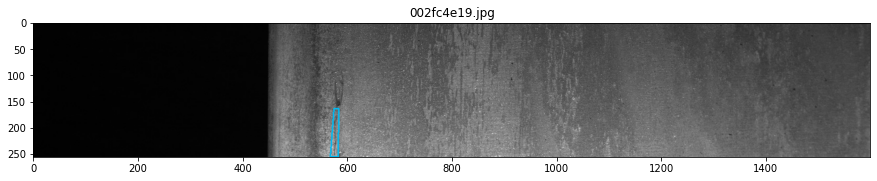

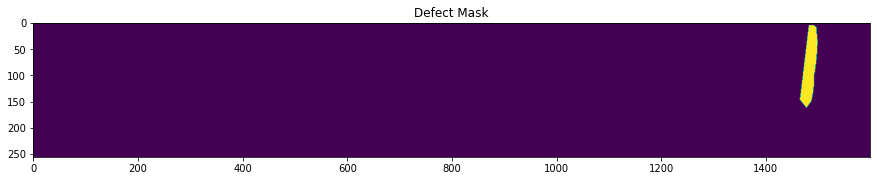

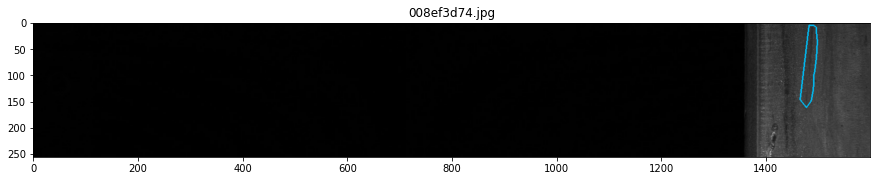

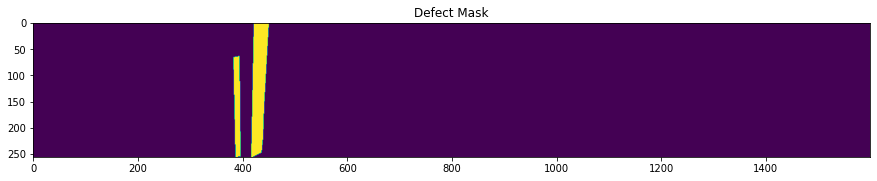

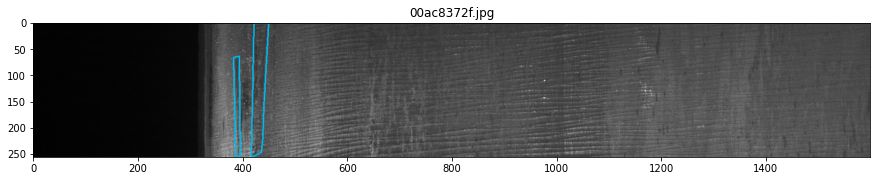

In [ ]:
for idx in idx_class_2[:3]:
    show_mask_image(idx, label=2)

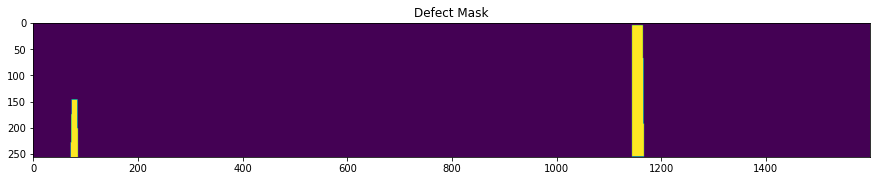

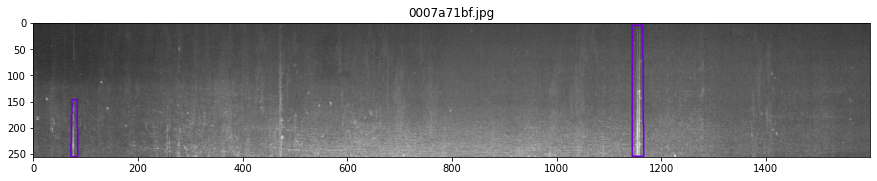

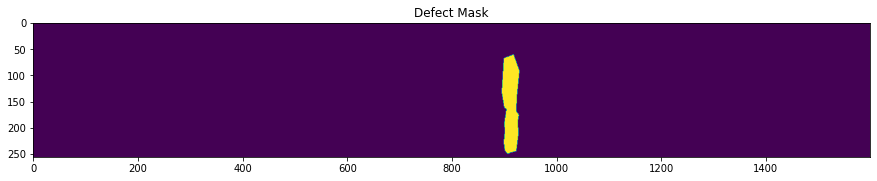

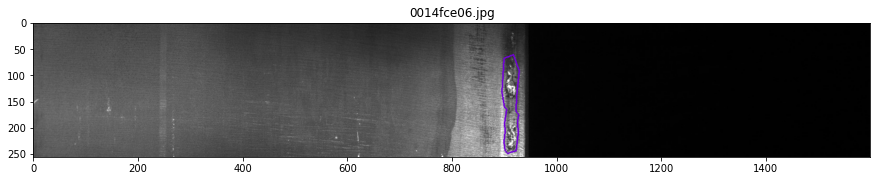

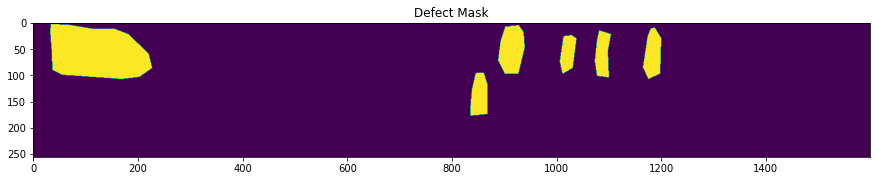

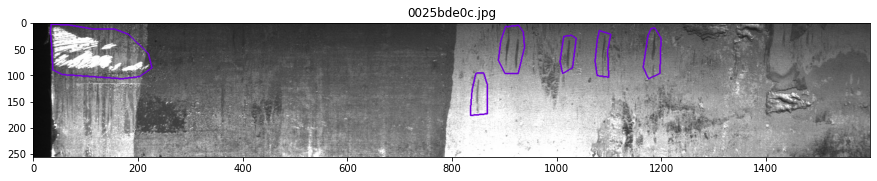

In [ ]:
for idx in idx_class_3[:3]:
    show_mask_image(idx , label=3)

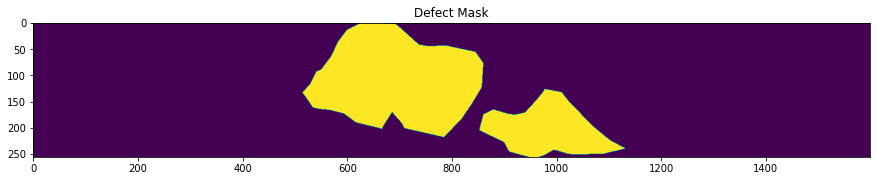

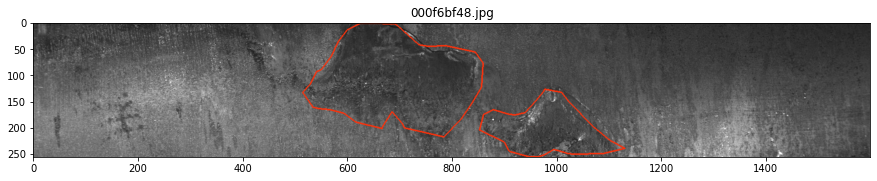

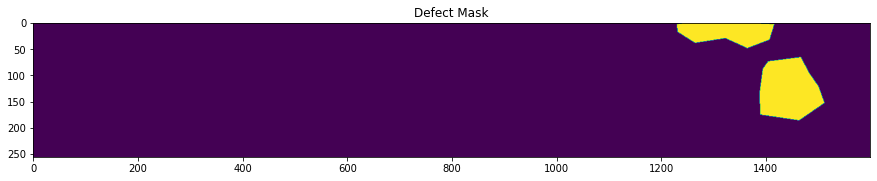

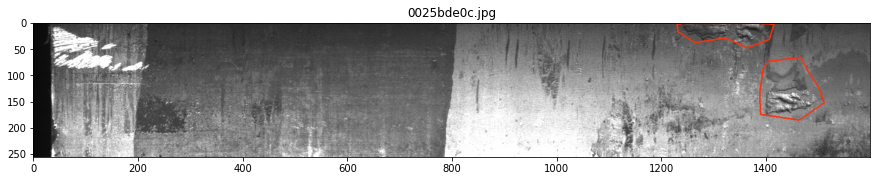

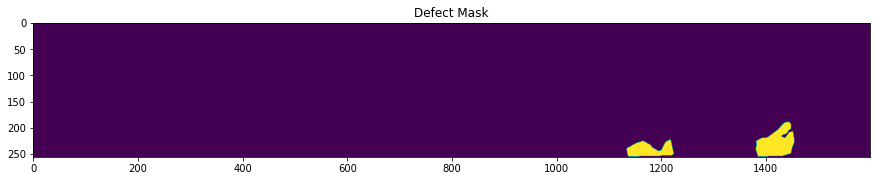

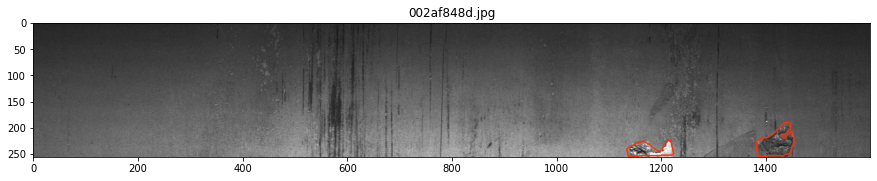

In [ ]:
for idx in idx_class_4[:3]:
    show_mask_image(idx, label=4)